<a href="https://colab.research.google.com/github/Arshad221b/Sign-Language-Recognition-/blob/CNN/ASLwithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

In [3]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 14.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1wG0gS-bqjV6yz1YveuxkvHT5_2DOuT05'})
download.GetContentFile('train.csv')
train = pd.read_csv('train.csv')

In [0]:
download = drive.CreateFile({'id': '1q_Zwlu3RncjKq1YpiVtkiMPxIIueGRYB'})
download.GetContentFile('test.csv')
test = pd.read_csv('test.csv')

In [0]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [0]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [0]:

classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))

classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)


Epoch 1/50
27455/27455 [==============================] - 3s 101us/step - loss: 2.9622 - acc: 0.5374
Epoch 2/50
27455/27455 [==============================] - 2s 84us/step - loss: 0.1277 - acc: 0.9681
Epoch 3/50
27455/27455 [==============================] - 2s 83us/step - loss: 0.0286 - acc: 0.9956
Epoch 4/50
27455/27455 [==============================] - 2s 84us/step - loss: 0.0075 - acc: 0.9996
Epoch 5/50
27455/27455 [==============================] - 2s 84us/step - loss: 0.0038 - acc: 0.9999
Epoch 6/50
27455/27455 [==============================] - 2s 83us/step - loss: 0.0242 - acc: 0.9921
Epoch 7/50
27455/27455 [==============================] - 2s 83us/step - loss: 0.0136 - acc: 0.9961
Epoch 8/50
27455/27455 [==============================] - 2s 84us/step - loss: 0.0139 - acc: 0.9964
Epoch 9/50
27455/27455 [==============================] - 2s 84us/step - loss: 7.4551e-04 - acc: 1.0000
Epoch 10/50
27455/27455 [==============================] - 2s 83us/step - loss: 2.9635e-04 - ac

In [30]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7172/7172 [==============================] - 1s 90us/step
Accuracy:  0.831846068042387


In [31]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               18560     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
__________

In [0]:
from keras.utils.vis_utils import plot_model

In [0]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [35]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
Double check with Python 3


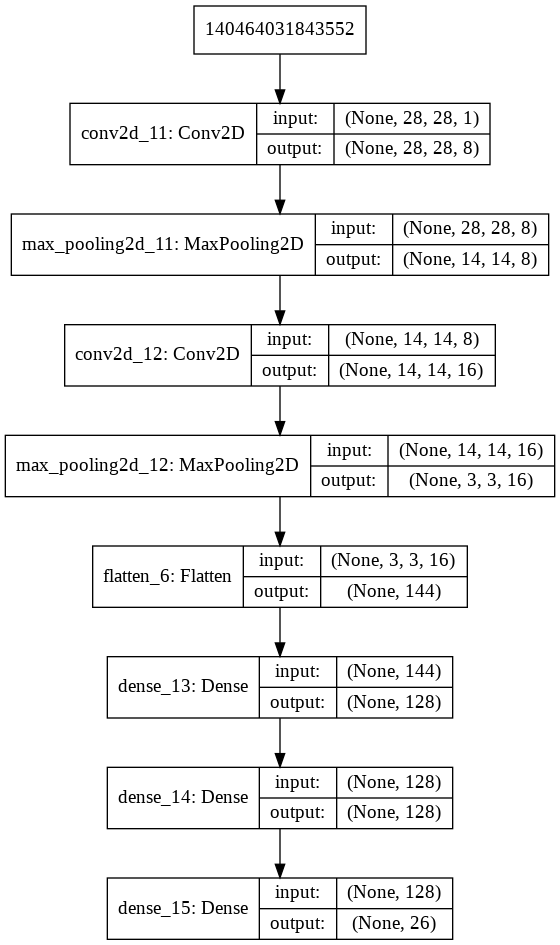

In [36]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [38]:
classifier.save('CNNmodel.h5')
weights_file = drive.CreateFile({'title' : 'CNNmodel.h5'})
weights_file.SetContentFile('CNNmodel.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '10ni-9CkGiX5sou1O2V3apW82Hl2Dcsfq'})